In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering


# Nedbør:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og "forfalsker" datafeil

In [2]:
# Oppretter filstien til JSONfil med nedbør
nedbor_fil = "../data/frost_nedbor.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_nedbor = DataRens()
manip_nedbor = DataManipulering()


# Lager DataFrame av en JSON
df = rens_nedbor.fra_json_til_dataframe(nedbor_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_nedbor.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_nedbor.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())


Fjern verdi for år 1995 (rad: 15)
Legger til duplikat for år 1999.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),766.8,mm,PT6H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),712.2,mm,PT6H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),840.5,mm,PT6H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),646.1,mm,PT6H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),871.4,mm,PT6H,C,1984


- Bruker metoder fra DataRens for å rense dataframen

In [3]:
# Bruke metode for å rense Dataframen
df_nedbor_renset = rens_nedbor.rens_DataFrame(df_legg_til_duplikater)

# Legge til nye gjennomsnittlige verdier
df_nedbor_renset_gjennomsnittlige_verdier = rens_nedbor.nye_nedbør_verdier(df_nedbor_renset)

# Printer ut renset dataframe av nedbør
display("Ferdig renset dataframe: ", df_nedbor_renset_gjennomsnittlige_verdier)


Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 1995    NaN   mm
Manglende verdier er erstattet med gjennomsnittet:  832.8


'Ferdig renset dataframe: '

,year,total_values,value,unit,days
0,1980,766.8,2.10,mm,366
1,1981,712.2,1.95,mm,365
2,1982,840.5,2.30,mm,365
3,1983,646.1,1.77,mm,365
4,1984,871.4,2.38,mm,366
5,1985,910.4,2.49,mm,365
6,1986,709.6,1.94,mm,365
7,1987,852.5,2.34,mm,365
8,1988,1082.8,2.96,mm,366
9,1989,777.8,2.13,mm,365


# Beregninger av statistiske mål:
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [4]:
nedbor_mål = Statistiske_maal()

gjennomsnitt_nedbor = nedbor_mål.gjennomsnitt(df_nedbor_renset_gjennomsnittlige_verdier)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_nedbor.items():
    print(f"{key}: {value} mm")



Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 2.24 mm
1990-1999: 2.02 mm
2000-2009: 2.4 mm
2010-2020: 2.45 mm
Totalt: 2.28 mm


**Beregning av median**

In [5]:
median_nedbor = nedbor_mål.median(df_nedbor_renset_gjennomsnittlige_verdier)

print("Median i 4 intervaller + totalt: ")
for key, value in median_nedbor.items():
    print(f"{key}: {value} mm")

Median i 4 intervaller + totalt: 
1980-1989: 2.22 mm
1990-1999: 2.05 mm
2000-2009: 2.34 mm
2010-2020: 2.58 mm
Totalt: 2.24 mm


**Beregning av standardavvik**

In [6]:
standardavvik_nedbor = nedbor_mål.standardavvik(df_nedbor_renset_gjennomsnittlige_verdier)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_nedbor.items():
    print(f"{key}: {value} mm")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 0.34 mm
1990-1999: 0.3 mm
2000-2009: 0.39 mm
2010-2020: 0.41 mm
Totalt: 0.39 mm


# Visualiseringer:

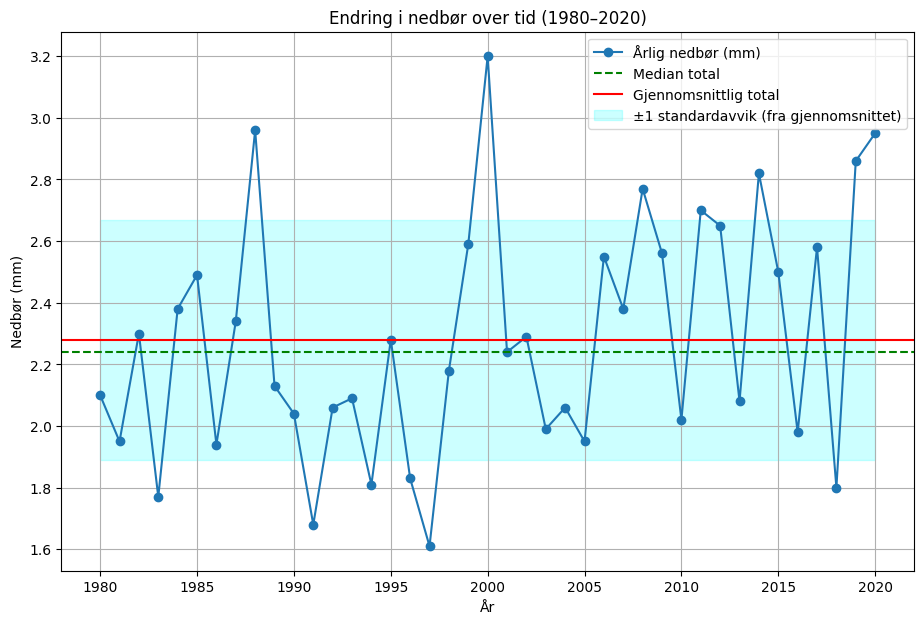

In [7]:
år = df_nedbor_renset_gjennomsnittlige_verdier["year"]
verdier = df_nedbor_renset_gjennomsnittlige_verdier["value"]
median = median_nedbor["Totalt"]
gjennomsnitt = gjennomsnitt_nedbor["Totalt"]
standardavvik = standardavvik_nedbor["Totalt"]

#Lager et figurvindu for visning 
plt.figure(figsize=(11, 7))

#Tegner selve diagrammet 
plt.plot(år, verdier, marker='o', label='Årlig nedbør (mm)')
plt.title('Endring i nedbør over tid (1980–2020)')
plt.xlabel('År')
plt.ylabel('Nedbør (mm)')

#Legger inn de statistiske målene
plt.axhline(y= median, color="green", linestyle='--', label="Median total")
plt.axhline(y=gjennomsnitt, color="red", label="Gjennomsnittlig total")
plt.fill_between(år, gjennomsnitt - standardavvik, gjennomsnitt + standardavvik,
                 color='cyan', alpha=0.2, label='±1 standardavvik (fra gjennomsnittet)')

#Justerer visningen av figuren 
plt.grid(True)
plt.legend()
plt.show()

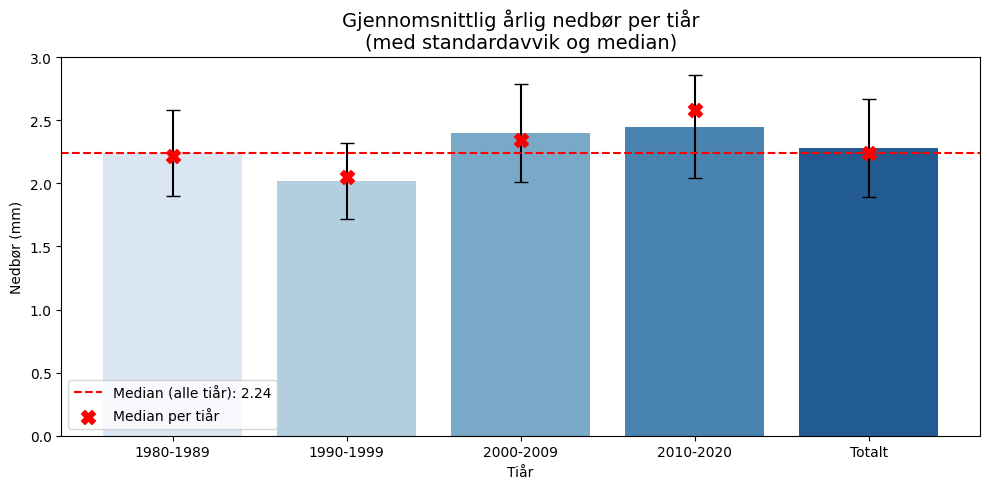

In [8]:
#Henter ut data
år = gjennomsnitt_nedbor.keys()
gjennomsnittlige_verdier = gjennomsnitt_nedbor.values()
median_verdier = median_nedbor.values()
std_verdier = standardavvik_nedbor.values()

#Etablerer data
data = {
    'Tiår': år,
    'Gjennomsnitt': gjennomsnittlige_verdier,
    'StdAvvik': std_verdier,
    'Median': median_verdier
}

df = pd.DataFrame(data)

# Lag plott
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='Tiår', y='Gjennomsnitt', hue='Tiår', palette='Blues')

#Legger til stolper for standardavvik (med )
for i, row in df.iterrows():
    ax.errorbar(x=i, y=row['Gjennomsnitt'], yerr=row['StdAvvik'], fmt='none', c='black', capsize=5)

# Legg til horisontal linje for medianen av hele perioden
median_all_years = df['Median'].median()  # Beregn medianen for hele datasettet
plt.axhline(median_all_years, color='red', linestyle='--', label=f"Median (alle tiår): {median_all_years}")

# Legg til medianen for hvert tiår som prikker
ax.scatter(df.index, df['Median'], color='red', zorder=5, label="Median per tiår", s=100, marker='X')

# Legg til tittel og akseetiketter
plt.title("Gjennomsnittlig årlig nedbør per tiår\n(med standardavvik og median)", fontsize=14)
plt.ylabel("Nedbør (mm)")
plt.xlabel("Tiår")
plt.legend()
plt.tight_layout()
plt.show()


# Lagrer variablene til bruk i annen fil

In [9]:
%store gjennomsnitt_nedbor
%store median_nedbor
%store standardavvik_nedbor
%store df_nedbor_renset_gjennomsnittlige_verdier

Stored 'gjennomsnitt_nedbor' (dict)
Stored 'median_nedbor' (dict)
Stored 'standardavvik_nedbor' (dict)
Stored 'df_nedbor_renset_gjennomsnittlige_verdier' (DataFrame)


# Predektiv analyse av nedbør

In [14]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from prediktiv_analyse import TrendModel

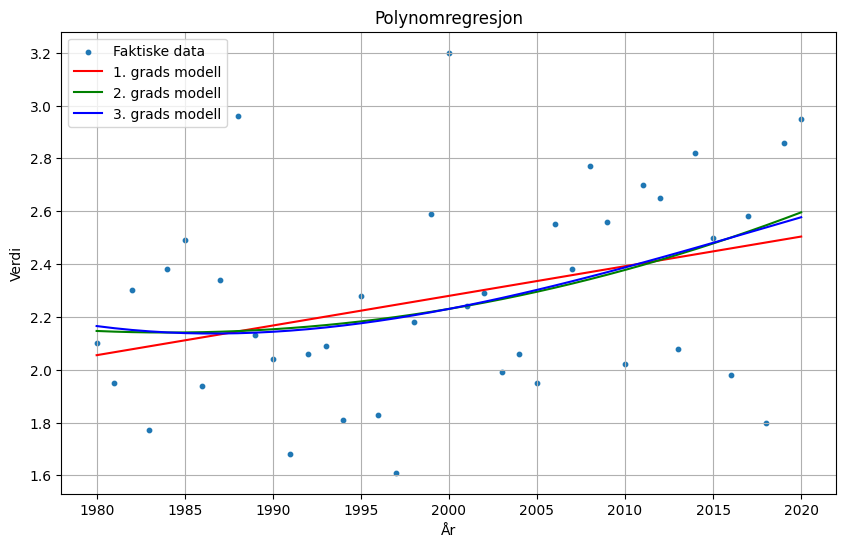

R²-scorer for modellene:
  1. grads modell: 0.1209
  2. grads modell: 0.1342
  3. grads modell: 0.1346


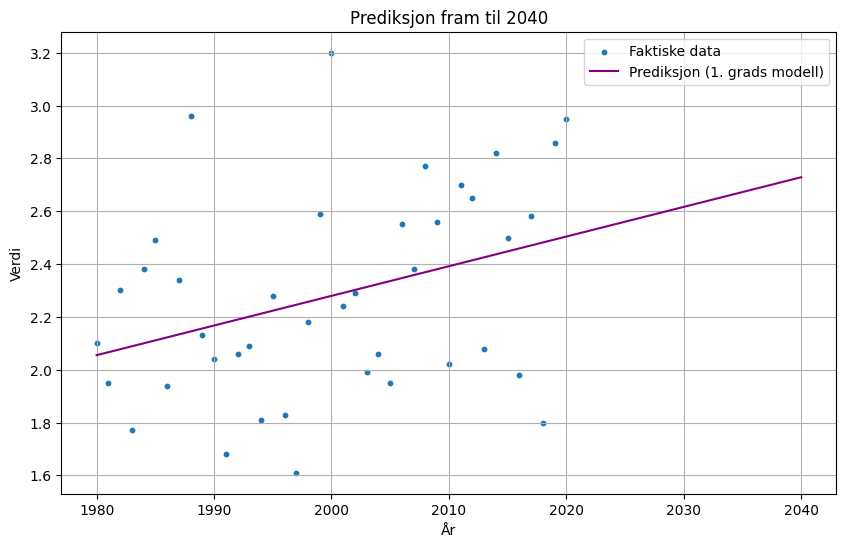

In [15]:
temp_model = TrendModel(df_nedbor_renset_gjennomsnittlige_verdier)
temp_model.fit_models()
temp_model.plot_models()
temp_model.print_r2_scores()
temp_model.plot_prediction(2040, deg=1)
